# #04: Random Boolean Function Generation

This tutorial focuses on the random generation of Boolean functions with
prescribed properties, enabling large-scale computational studies.

Random Boolean function generation enables:
1. Null model comparisons: Are biological networks special?
2. Ensemble studies: How do structural properties affect dynamics?
3. Robustness testing: Sample the space of equivalent models
4. Theoretical predictions: Derive expected values for network properties

## What you will learn
In this tutorial you will learn how to generate random Boolean functions with:

- specified canalizing properties (depth, layer structure),
- bias, absolute bias, or a specific Hamming weight,
- linearity constraints,
- degeneracy constraints.

It is strongly recommended to complete the previous tutorials first.

---
## 0. Setup

In [1]:
import boolforge
import numpy as np
import matplotlib.pyplot as plt

---
## 1. Generating random Boolean functions

The function `boolforge.random_function(n, *args)` generates a random $n$-input
Boolean function subject to optional constraints. By default, it generates a
**non-degenerate** function, meaning that all variables are essential.

In [2]:
n = 3
f = boolforge.random_function(n)

boolforge.display_truth_table(f, labels="f_random_non_degenerate")

print("Is f degenerate?", f.is_degenerate())
print("Activities of f:", f.get_activities(exact=True))
print("Edge effectiveness of f:", f.get_edge_effectiveness())

x0	x1	x2	|	f_random_non_degenerate
-------------------------------------------------------
0	0	0	|	0
0	0	1	|	0
0	1	0	|	0
0	1	1	|	1
1	0	0	|	0
1	0	1	|	1
1	1	0	|	1
1	1	1	|	0
Is f degenerate? False
Activities of f: [0.75 0.75 0.75]
Edge effectiveness of f: [0.8333333333333334, 0.8333333333333334, 0.8333333333333334]


The rest of this tutorial describes the various constraints. 
Each constraint defines a specific family of n-input Boolean functions, 
from which `boolforge.random_function(n,*args)` samples *uniformly at random*. 
That is, each function satisfying a given set of constraints is selected with equal probability.

---
## 2. Parity functions

Setting `parity=True` generates *parity* functions (also known as *linear* functions).

In [3]:
f = boolforge.random_function(n, parity=True)

boolforge.display_truth_table(f, labels="f_linear")

print("Activities:", f.get_activities(exact=True))
print("Edge effectiveness:", f.get_edge_effectiveness())
print("Normalized average sensitivity:", f.get_average_sensitivity(exact=True))
print("Canalizing strength:", f.get_canalizing_strength())

# Parity functions are the only Boolean functions with activity 1 (for all variables),
# normalized average sensitivity 1 and canalizing strength 0.

x0	x1	x2	|	f_linear
----------------------------------------
0	0	0	|	1
0	0	1	|	0
0	1	0	|	0
0	1	1	|	1
1	0	0	|	0
1	0	1	|	1
1	1	0	|	1
1	1	1	|	0
Activities: [1. 1. 1.]
Edge effectiveness: [1.0, 1.0, 1.0]
Normalized average sensitivity: 1.0
Canalizing strength: 0.0


---
## 3. Functions with prescribed canalizing properties

If `PARITY=False` (default), the canalizing layer structure can be specified
via `layer_structure`. This specifies the number of conditionally canalizing variables in each layer of the randomly generated function. 
If the optional argument `exact_depth=True` (default is False), 
then this describes the exact layer structure, i.e., the core function cannot be canalizing.
If `exact_depth=False` (the default), it is possible that the core function is canalizing, 
meaning that the last described layer in `layer_structure` may have more conditionally canalizing variables, 
or that there are additional canalizing layers. 

Before generating any random function, `random_function()` goes through a number of checks 
ensuring that the provided optional arguments make sense. 
For example, it checks that the provided layer structure $(k_1,\ldots,k_r)$ satisfies
- $k_i\geq 1$, 
- $k_1 + \cdots + k_r \leq n$, and
- if $k_1 + \cdots + k_r = n$, then $k_r \geq 2$ because the last layer of a nested canalizing function must always contain two or more variables.

In [4]:
f = boolforge.random_function(n, layer_structure=[1])
g = boolforge.random_function(n, layer_structure=[1], exact_depth=True)
h = boolforge.random_function(n, layer_structure=[3])
k = boolforge.random_function(n, layer_structure=[1, 2])

labels = ["f", "g", "h", "k"]
boolforge.display_truth_table(f, g, h, k, labels=labels)

for func, label in zip([f, g, h, k], labels):
    info = func.get_layer_structure()
    print(f"Canalizing depth of {label}: {func.get_canalizing_depth()}")
    print(f"Layer structure of {label}: {info['LayerStructure']}")
    print(f"Number of layers of {label}: {info['NumberOfLayers']}")
    print(f"Core function of {label}: {info['CoreFunction']}")
    print()

x0	x1	x2	|	f	g	h	k
---------------------------------------------------------
0	0	0	|	0	1	1	0
0	0	1	|	1	0	1	0
0	1	0	|	0	1	1	0
0	1	1	|	1	1	1	1
1	0	0	|	0	1	1	1
1	0	1	|	1	1	0	1
1	1	0	|	0	1	1	1
1	1	1	|	0	0	1	1
Canalizing depth of f: 3
Layer structure of f: [1, 2]
Number of layers of f: 2
Core function of f: [0]

Canalizing depth of g: 1
Layer structure of g: [1]
Number of layers of g: 1
Core function of g: [0 1 1 0]

Canalizing depth of h: 3
Layer structure of h: [3]
Number of layers of h: 1
Core function of h: [0]

Canalizing depth of k: 3
Layer structure of k: [1, 2]
Number of layers of k: 2
Core function of k: [1]



Repeated evaluation of this block of code shows that the canalizing depth of `f` is either 1 or 3
(note that a canalizing depth of $n-1$ is never possible for a non-degenerate function). 
On the contrary, the canalizing depth of `g` is always 1 because we set `exact_depth=True`. 
The 2-input core function of `g` is one of the two parity functions, each with 50% probability. 
Likewise, the core function for the other functions is simply [0] or [1], each with 50% probability. 
Functions `h` and `k` are nested canalizing, i.e., their canalizing depth is 3. 
Their layer structure is exactly as specified.

If we do not care about the specific layer structure but only about the canalizing depth, 
we specify the optional argument `depth` instead of `layer_structure`.

In [5]:
# any function has at least canalizing depth 0 so this is the same as boolforge.random_function(n)
f = boolforge.random_function(n,depth=0)

# a random non-canalizing function
g = boolforge.random_function(n,depth=0,exact_depth=True)

# a random canalizing function
h = boolforge.random_function(n,depth=1)

# a random nested canalizing function
k = boolforge.random_function(n,depth=n)

labels = ["f", "g", "h", "k"]
boolforge.display_truth_table(f, g, h, k, labels=labels)

for func, label in zip([f, g, h, k], labels):
    print(f"Canalizing depth of {label}: {func.get_canalizing_depth()}")
    print()

x0	x1	x2	|	f	g	h	k
---------------------------------------------------------
0	0	0	|	1	1	0	0
0	0	1	|	0	0	1	0
0	1	0	|	1	1	0	1
0	1	1	|	1	0	0	1
1	0	0	|	1	1	1	1
1	0	1	|	0	1	0	0
1	1	0	|	0	0	0	1
1	1	1	|	0	0	0	1
Canalizing depth of f: 0

Canalizing depth of g: 0

Canalizing depth of h: 1

Canalizing depth of k: 3



Repeated evaluation of this block of code shows that the canalizing depth of `f` can be 0, 1, or 3. 
Note that specifying `depth=0` without `exact_depth=True` does not restrict the space of functions at all. 
On the contrary, the canalizing depth of `g` is always 0 (i.e., g does not contain any canalizing variables) because we set `exact_depth=True`.
Function `h` is canalizing and may be nested canalizing (because we specified that the minimal canalizing depth is 1), 
and `k` is always nested canalizing (i.e., it has canalizing depth $n=3$).

We remember: If `exact_depth=True`, `depth` is interpreted as exact canalizing depth. 
Otherwise (default), `depth` is interpreted as minimal canalizing depth. 
For example,

- `depth=1`: "At least 1-canalizing" (could be 2,3,...,n-canalizing)
- `depth=1, exact_depth=True`: "Exactly 1-canalizing" (not 2,3,...,n-canalizing)

---
## 4. Allowing degenerate functions

It is possible that an n-input Boolean function does not depend on all its variables.
For example, the function $f(x,y) = x$ depends on $x$ but not on $y$. 
By default, such degenerate functions are never generated by `boolforge.random_function()`.
To enable the generation of possibly degenerate functions, we set `allow_degenerate_functions=True`.
Although hardly of any practical value, we can even restrict the random generation to degenerate functions only, using `boolforge.random_degenerate_function(n,*args)`. 

Since degenerate functions occur much more frequently at low degree, we set `n=2`, 
generate a large number of random, possibly degenerate functions and 
compare a histogram of the observed number of essential variables to the expected proportions.

Error: [ 0.0019 -0.0003 -0.0016]


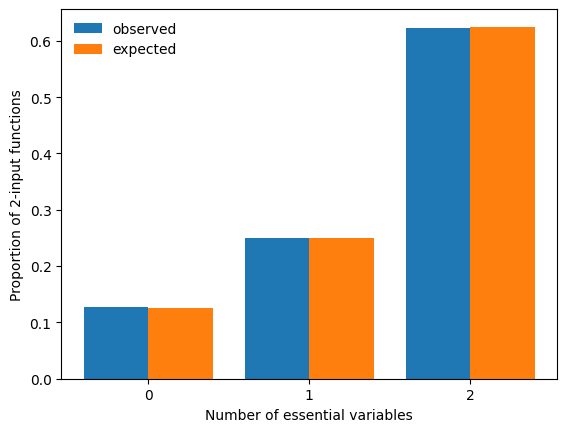

In [6]:
n = 2
n_simulations = 10000

count_essential = np.zeros(n + 1, dtype=int)

for _ in range(n_simulations):
    f = boolforge.random_function(n, allow_degenerate_functions=True)
    count_essential[f.get_number_of_essential_variables()] += 1

expected = np.array([2 / 16, 4 / 16, 10 / 16])

x = np.arange(n + 1)
width = 0.4

fig, ax = plt.subplots()
ax.bar(x - width / 2, count_essential / n_simulations, width=width, label="observed")
ax.bar(x + width / 2, expected, width=width, label="expected")
ax.legend(frameon=False)
ax.set_xticks(x)
ax.set_xlabel("Number of essential variables")
ax.set_ylabel(f"Proportion of {n}-input functions")

print("Error:", count_essential / n_simulations - expected)
plt.show()

---
## 5. Functions with prescribed Hamming weight

The Hamming weight of a Boolean function is the number of ones in its truth table.
BoolForge allows for the generation of random n-input functions with a specific Hamming weight $w\in\{0,1,\ldots,2^n\}$.
The additional optional parameters `allow_degenerate_functions` and `exact_depth` 
specify whether degenerate and canalizing functions are allowed.
By default, canalizing functions are allowed, while degenerate functions are not. 
Since all functions with Hamming weight $w\in\{0,1,2^n-1,2^n\}$ are canalizing, 
we require $2\leq w\leq 2^n-2$ whenever canalizing functions are not permissible (i.e., whenever`exact_depth=True`).

In [7]:
n = 3

f = boolforge.random_function(n, hamming_weight=5)
g = boolforge.random_function(n, hamming_weight=5, exact_depth=True)
h = boolforge.random_function(n, hamming_weight=2, allow_degenerate_functions=True)

labels = ["f", "g", "h"]
boolforge.display_truth_table(f, g, h, labels=labels)

for func, label in zip([f, g, h], labels):
    print(f"Hamming weight of {label}: {func.get_hamming_weight()}")
    print(f"Canalizing depth of {label}: {func.get_canalizing_depth()}")
    print(f"Number of essential variables of {label}: {func.get_number_of_essential_variables()}")
    print()

x0	x1	x2	|	f	g	h
-------------------------------------------------
0	0	0	|	1	0	0
0	0	1	|	0	1	1
0	1	0	|	1	1	0
0	1	1	|	0	0	0
1	0	0	|	1	1	0
1	0	1	|	0	1	1
1	1	0	|	1	0	0
1	1	1	|	1	1	0
Hamming weight of f: 5
Canalizing depth of f: 3
Number of essential variables of f: 3

Hamming weight of g: 5
Canalizing depth of g: 0
Number of essential variables of g: 3

Hamming weight of h: 2
Canalizing depth of h: 2
Number of essential variables of h: 2



---
## 6. Biased and absolutely biased functions

While specifying the Hamming weight fixes the exact number of 1s in the truth table of a generated function, 
specifying the bias or absolute bias acts slightly differently. 
The bias $p$ describes the probability of selecting a 1 at any position in the truth table and can be modified using the optional argument `bias`. 
Instead of specifying the bias, the absolute bias may also be specified. 
Unbiased functions generated using $p=0.5$ have an absolute bias of $0$, the default.
If, for example, we set `absolute_bias=0.5` and specify to use absolute bias (`use_absolute_bias=True`, default is False), 
the bias used to generate the function is either 0.25 or 0.75, both with probability 50%. 
Generally, if we set `use_absolute_bias=True; absolute_bias=a` for $a\in [0,1]$, 
the bias is either $(1+a)/2$ or $(1-a)/2$, both with probability 50%. 

To display these different modes, we repeatedly generate random Boolean functions 
under three different constraints (`f` with bias $p=0.75$, `g` with absolute bias 0.5, and `h` an unbiased function, i.e., with bias $p=0.5$), 
and compare the empirical Hamming weight distribution of the three families of functions.

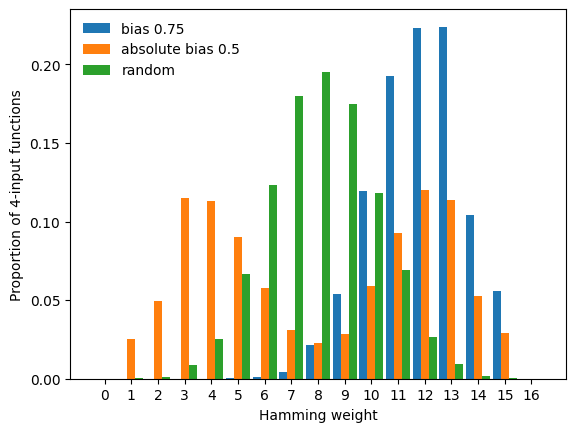

In [8]:
n = 4
n_simulations = 10000

counts = np.zeros((3, 2**n + 1), dtype=int)

for _ in range(n_simulations):
    f = boolforge.random_function(n, bias=0.75)
    g = boolforge.random_function(n, absolute_bias=0.5, use_absolute_bias=True)
    h = boolforge.random_function(n, absolute_bias=0.5)

    counts[0, f.get_hamming_weight()] += 1
    counts[1, g.get_hamming_weight()] += 1
    counts[2, h.get_hamming_weight()] += 1

labels = ["bias 0.75", "absolute bias 0.5", "random"]
x = np.arange(2**n + 1)
width = 0.3

fig, ax = plt.subplots()
for i, label in enumerate(labels):
    ax.bar(x - width + i * width, counts[i] / n_simulations, width=width, label=label)

ax.legend(frameon=False)
ax.set_xticks(x)
ax.set_xlabel("Hamming weight")
ax.set_ylabel(f"Proportion of {n}-input functions")
plt.show()

This plot exemplifies the difference between bias and absolute bias:

- Specifying the bias shifts the mode of the Hamming weight distribution to the value of `bias`.
- Specifying the absolute bias yields random functions with a bimodal Hamming weight distribution. 

Note that `absolute_bias=0.5` is ignored in the generation of `h`. 
The desired use of absolute bias must be specified by `use_absolute_bias=True`.

In the above plot, we notice a lack of functions with Hamming weight 0 and $16=2^n$.
These constant functions are degenerate and thus not generated unless we set `allow_degenerate_functions=True`, 
which as we see below slightly modifies the resulting Hamming weight distributions.

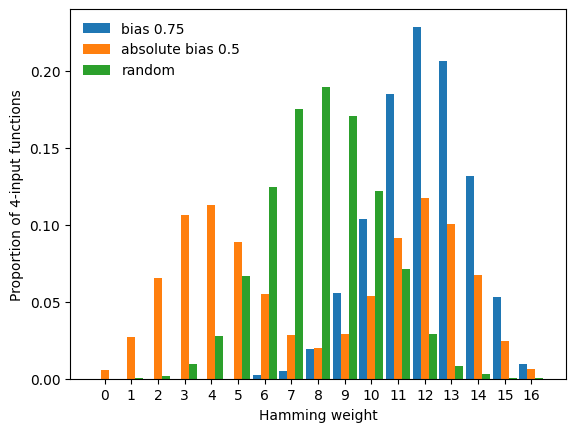

In [9]:
counts[:] = 0

for _ in range(n_simulations):
    f = boolforge.random_function(n, bias=0.75, allow_degenerate_functions=True)
    g = boolforge.random_function(
        n, absolute_bias=0.5, use_absolute_bias=True, allow_degenerate_functions=True
    )
    h = boolforge.random_function(n, absolute_bias=0.5, allow_degenerate_functions=True)

    counts[0, f.get_hamming_weight()] += 1
    counts[1, g.get_hamming_weight()] += 1
    counts[2, h.get_hamming_weight()] += 1

fig, ax = plt.subplots()
for i, label in enumerate(labels):
    ax.bar(x - width + i * width, counts[i] / n_simulations, width=width, label=label)

ax.legend(frameon=False)
ax.set_xticks(x)
ax.set_xlabel("Hamming weight")
ax.set_ylabel(f"Proportion of {n}-input functions")
plt.show()

---
## 7. Summary, interpretation, and outlook

This tutorial demonstrated how BoolForge enables uniform random generation of
Boolean functions under flexible structural and statistical constraints.

Different constraints define fundamentally different ensembles, and being
explicit about these choices is essential for a correct generation and interpretation of
computational results.

**Next steps:** In the next tutorial, these function-level ensembles will be
used to study how Boolean function structure influences sensitivity and canalizing properties.

---
## 8. Common pitfalls

- `absolute_bias` has no effect unless `use_absolute_bias=True`.
- `depth=0` without `exact_depth=True` does not restrict the function space.
- Constant functions are generated only if `allow_degenerate_functions=True`.
- For larger $n$ (for sure whenever $n>10$), set `allow_degenerate_functions=True` to avoid expensive degeneracy tests. 
Almost all functions in many variables are non-degenerate.